In [1]:
%reload_ext autoreload
%autoreload 2

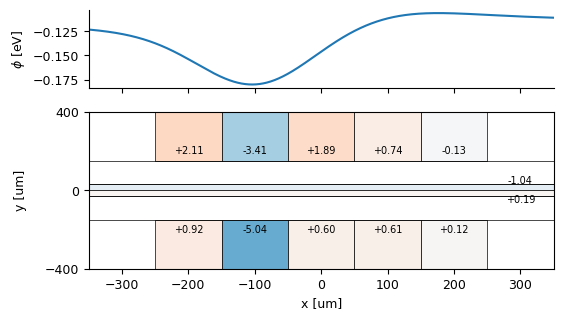

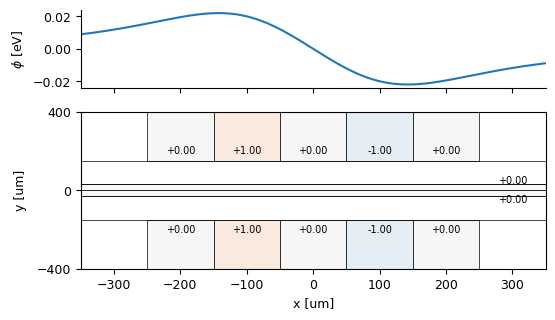

In [2]:
import numpy as np
from models.surface_trap import SurfaceTrap
from models.surface_trap.plot import plot_voltages_on_trap
from pytrans.ions import Ca40, Be9, Mg24


trap = SurfaceTrap()
voltages = np.array([-1.03680679, 0.19411571, 2.10824776, -3.40701046, 1.88571987,
                     0.73699269, -0.12520335, 0.91544312, -5.0391288, 0.59976997,
                     0.60904511, 0.12365927])

_ = plot_voltages_on_trap(trap, voltages)

voltages_x = np.asarray([
    0, 0, 
    0, 1, 0, -1, 0,
    0, 1, 0, -1, 0,
])
_ = plot_voltages_on_trap(trap, voltages_x)


# Analysis

Exec minimize
- minimize elapsed time: 19.001 ms
--------------
Trap potential analysis for ion Average[Ca40, Ca40, Ca40, Ca40]: 
Equilibrium position [um]
[-103.8607    0.432    65.7408]
Gradient [V/m]
[0.0539 0.0584 0.0335]
Displacement at 1 MHz [um]
[0.0033 0.0036 0.0021]
Hessian [V/m2]
[[8.0327e+06 2.2895e+05 2.4673e+05]
 [2.2895e+05 6.6124e+08 3.5040e+07]
 [2.4673e+05 3.5040e+07 6.9355e+08]]
Normal mode frequencies [MHz]
[0.700891 6.25044 6.6172]
Eigenvectors
[[1 -0.000332 -0.000343]
 [-9.48e-05 -0.842 0.539]
 [-0.000468 -0.539 -0.842]]
Tilt angle of mode 2 (6.62): 57.37°
--------------
Mode solver analysis for ion crystal [Ca40, Ca40, Ca40, Ca40]: 
Equilibrium positions [um]
[[-112.0285    0.4362   65.7409]
 [-106.4686    0.4329   65.7414]
 [-101.3401    0.4312   65.7396]
 [ -95.8032    0.4308   65.7353]]
Normal modes
  Freq [MHz]                    Ca40                                Ca40                                Ca40                                Ca40
------------  -----

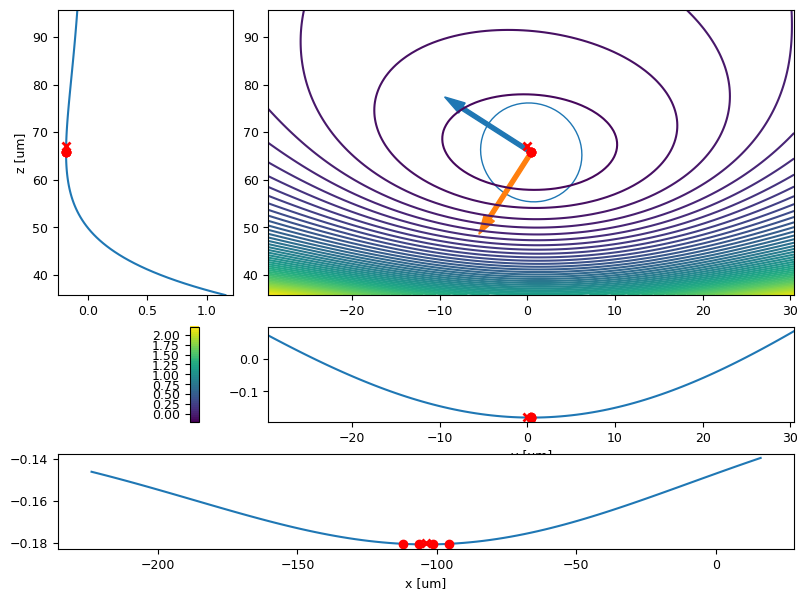

In [5]:
from pytrans.analysis.analysis import analyse_potential

# find_3dmin

r0 = (trap.x_ele(2), 0, trap.z0)
roi = (120e-6, 30e-6, 30e-6)
res_pot = analyse_potential(trap, voltages, ions=[Ca40]*4, r0=r0, roi=roi, find_3dmin=True, 
                            minimize_options=dict(accuracy=1e-8))


# res_pot_mg = analyse_potential(trap, voltages, ions=Mg24, r0=r0, roi=roi, find_3dmin=True,
#                                 minimize_options=dict(accuracy=1e-8))


# r1 = (trap.x_ele(3), 0, trap.z0)
# res_pot_x = analyse_potential(trap, voltages_x, ions=Ca40, r0=r1, roi=roi, find_3dmin=False, pseudo=False,
#                                 minimize_options=dict(accuracy=1e-8))


# Single ion, find_3dmin

In [10]:
Ca40 == Ca40

True

Exec minimize
- minimize elapsed time: 74.988 ms
--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[-165.0047    0.0237   69.7661]
Gradient [V/m]
[-0.117  -0.6207 -5.1669]
Displacement at 1 MHz [um]
[-0. -0. -0.]
Hessian [V/m2]
[[1.6327e+07 1.6644e+05 1.3004e+05]
 [1.6644e+05 4.6988e+08 4.9957e+07]
 [1.3004e+05 4.9957e+07 3.8285e+08]]
Normal mode frequencies [MHz]
[0.999259 4.6929 5.48881]
Eigenvectors
[[1 -0.000333 -0.000309]
 [0.000144 -0.414 0.91]
 [-0.000431 -0.91 -0.414]]
Tilt angle of mode 2 (5.49): 24.47°

Exec minimize
- minimize elapsed time: 59.029 ms
--------------
Trap potential analysis for ion Mg24: 
Equilibrium position [um]
[-164.9999    0.0138   69.7828]
Gradient [V/m]
[-0.039   0.0513  0.4392]
Displacement at 1 MHz [um]
[-0.  0.  0.]
Hessian [V/m2]
[[1.6277e+07 1.6647e+05 9.6645e+04]
 [1.6647e+05 7.9334e+08 4.9946e+07]
 [9.6645e+04 4.9946e+07 6.3390e+08]]
Normal mode frequencies [MHz]
[1.28787 7.94542 9.07203]
Eigenvectors
[[1 -0.000205 -

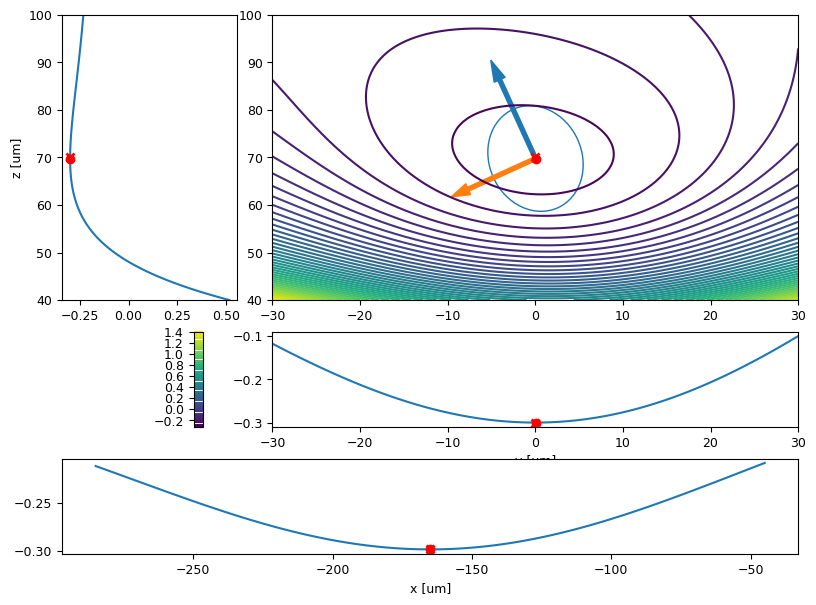

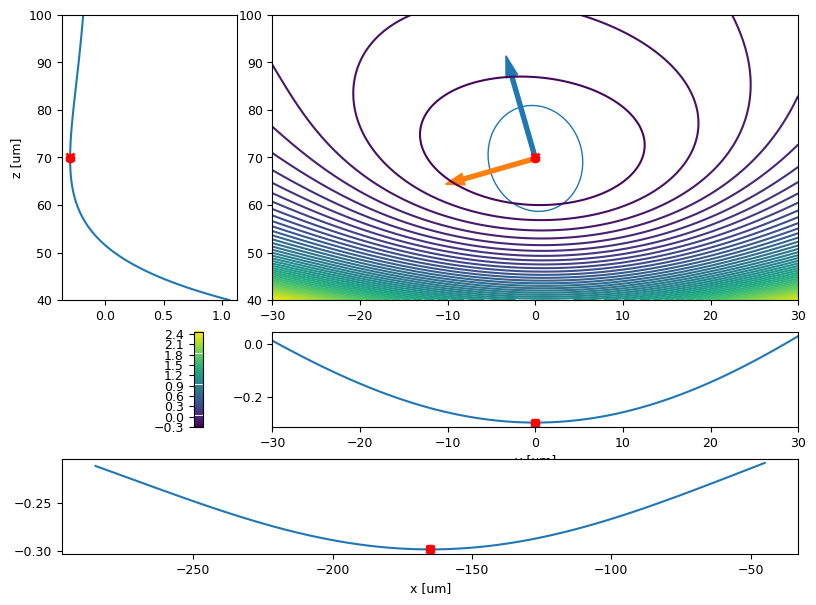

In [7]:

from pytrans.analysis.analysis import analyse_potential

r0 = (trap.x_ele(2), 0, trap.z0)

results = analyse_potential(trap, voltages, ions=Ca40, r0=r0, roi=(120e-6, 30e-6, 30e-6), find_3dmin=True, plot=True)
results = analyse_potential(trap, voltages, ions=Mg24, r0=r0, roi=(120e-6, 30e-6, 30e-6), find_3dmin=True, plot=True)


## Single ion no 3d_min

--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[ 0.  0. 70.]
Gradient [V/m]
[-442.7455   -0.       -0.    ]
Displacement at 1 MHz [um]
[-27.0771  -0.      -0.    ]
Hessian [V/m2]
[[  104541.1785       -0.     -4037317.8548]
 [      -0.            0.           -0.    ]
 [-4037317.8548       -0.           -0.    ]]
Normal mode frequencies [MHz]
[1.56526e-06 -0.493695 0.500129]
Eigenvectors
[[4.3e-12 -1 1.4e-12]
 [0.703 4.02e-12 0.712]
 [-0.712 -2.07e-12 0.703]]
Tilt angle of mode 2 (0.50): 90.00°



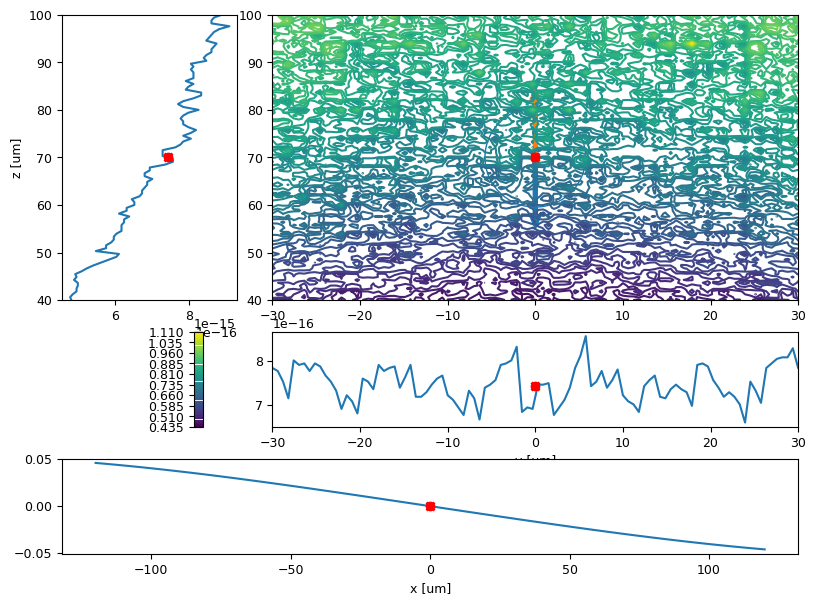

In [18]:
r1 = (trap.x_ele(3), 0, trap.z0)
results = analyse_potential(trap, voltages_x, ions=Ca40, r0=r1, roi=(120e-6, 30e-6, 30e-6), find_3dmin=False, pseudo=False)


## multi ion

--------------
Trap potential analysis for ion Average[Ca40, Ca40, Ca40, Ca40]: 
Equilibrium position [um]
[-164.982     0.0238   69.78  ]
Gradient [V/m]
[0.2559 0.1124 0.1538]
Displacement at 1 MHz [um]
[0.0156 0.0069 0.0094]
Hessian [V/m2]
[[1.6277e+07 1.6597e+05 1.3243e+05]
 [1.6597e+05 4.6958e+08 4.9927e+07]
 [1.3243e+05 4.9927e+07 3.8008e+08]]
Normal mode frequencies [MHz]
[0.997713 4.67771 5.48468]
Eigenvectors
[[1 -0.000331 -0.000319]
 [0.000156 -0.408 0.913]
 [-0.000432 -0.913 -0.408]]
Tilt angle of mode 2 (5.48): 24.07°
--------------
Mode solver analysis for ion crystal [Ca40, Ca40, Ca40, Ca40]: 
Equilibrium positions [um]
[[-171.406     0.0273   69.7757]
 [-167.0244    0.0243   69.78  ]
 [-162.9734    0.023    69.7787]
 [-158.5938    0.0231   69.7717]]
Normal modes
  Freq [MHz]                    Ca40                                Ca40                                Ca40                                Ca40
------------  ----------  ----------  ----------  ----------  ------

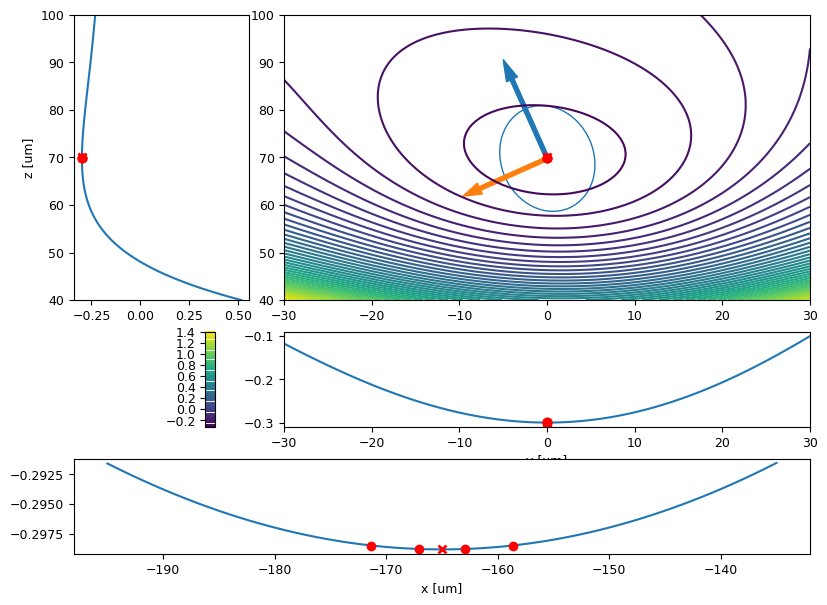

In [27]:
from pytrans.analysis.mode_solver import init_crystal

n_ions = 4
r0 = (trap.x_ele(2), 0, trap.z0)

x0 = init_crystal(r0, 3e-6, n_ions)

ions = [Ca40] * n_ions

results = analyse_potential(trap, voltages, ions=ions, r0=x0, roi=(30e-6, 30e-6, 30e-6), find_3dmin=True, verbose=False)
results